<a href="https://colab.research.google.com/github/aditi14534/EDA_Datasets/blob/main/traffic_accident_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/dataset_traffic_accident_prediction1.csv")

In [ ]:
df

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 93.5+ KB


In [ ]:
df.shape

(798, 14)

Univariate analysis on Numerical columns

The dataset has 798 rows and 14 columns.
There are 42 missing values per column.
There are 7 numerical and 7 categorical columns.
The target variable is accident" (binary: 0 or 1).

In [ ]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_df = df.select_dtypes(include=numerics)
len(numerical_df.columns)


7

In [ ]:
df.isna().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [ ]:
# Impute numerical columns with median
num_cols = ["Traffic_Density", "Speed_Limit", "Number_of_Vehicles",
            "Driver_Alcohol", "Driver_Age", "Driver_Experience"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Impute categorical columns with mode
cat_cols = ["Weather", "Road_Type", "Time_of_Day", "Accident_Severity",
            "Road_Condition", "Vehicle_Type", "Road_Light_Condition"]
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Drop rows where 'Accident' is missing (target variable)
df = df.dropna(subset=["Accident"])

# Verify missing values are handled
print(df.isnull().sum())

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


Speed limits around 50–60 are the most frequent.
There are also peaks at 80, 100, and 120.
Some extreme values exist at 180+, but they are rare.

<Axes: ylabel='Frequency'>

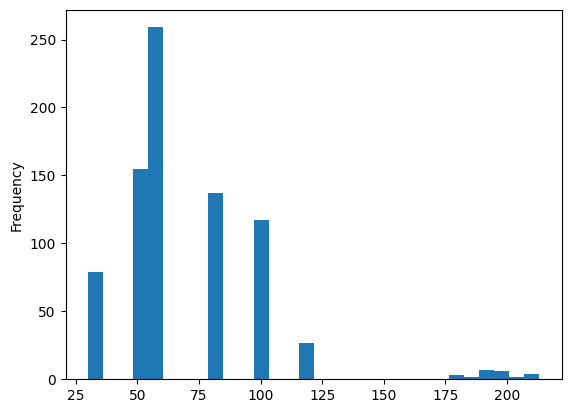

In [ ]:
df['Speed_Limit'].plot(kind='hist', bins=30)

<Axes: >

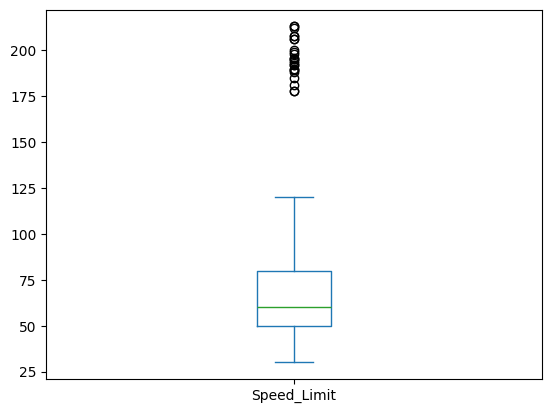

In [ ]:
df['Speed_Limit'].plot(kind='box')


In [ ]:
# Handling outliers in Speed_Limit by capping at the 99th percentile
speed_limit_threshold = df["Speed_Limit"].quantile(0.99)
df["Speed_Limit"] = df["Speed_Limit"].apply(lambda x: min(x, speed_limit_threshold))


<Axes: >

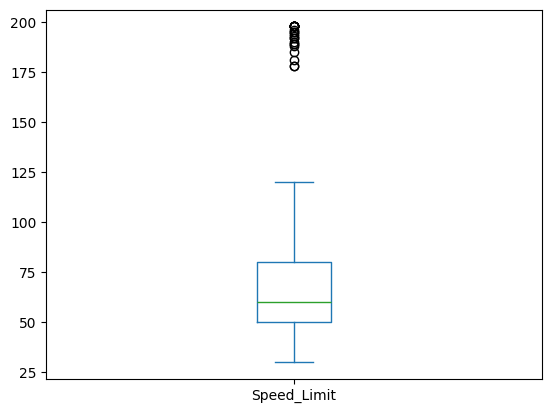

In [ ]:
df['Speed_Limit'].plot(kind='box')


We capped extreme values at the 99th percentile:
Speed_Limit:
Before: Max was 213 km/h (outlier).
After: Capped at 198 km/h.
Reason: Extremely high values could distort model performance.

<Axes: ylabel='Density'>

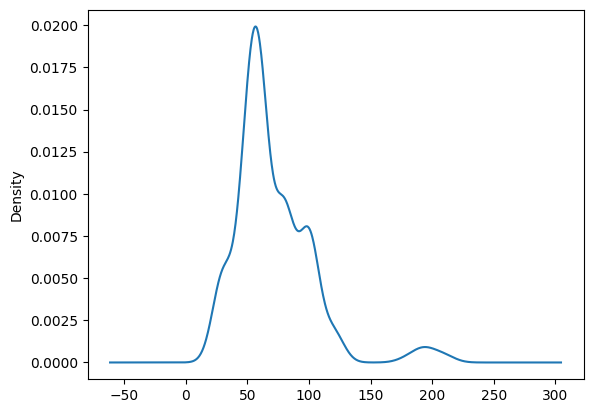

In [ ]:
df['Speed_Limit'].plot(kind='kde')


In [ ]:
df.Speed_Limit.skew()

1.8536719861559448

Most accidents involve 1 to 5 vehicles.
Peak at 3 vehicles—indicating that 3-vehicle accidents are the most common.
Few accidents involve more than 6 vehicles, meaning multi-vehicle pileups are rare.

<Axes: ylabel='Frequency'>

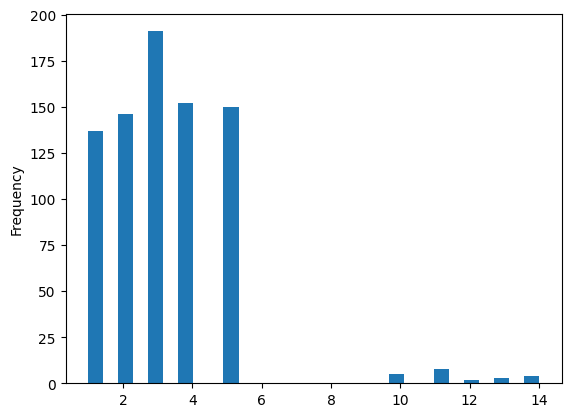

In [ ]:
df['Number_of_Vehicles'].plot(kind='hist', bins=30)

<Axes: >

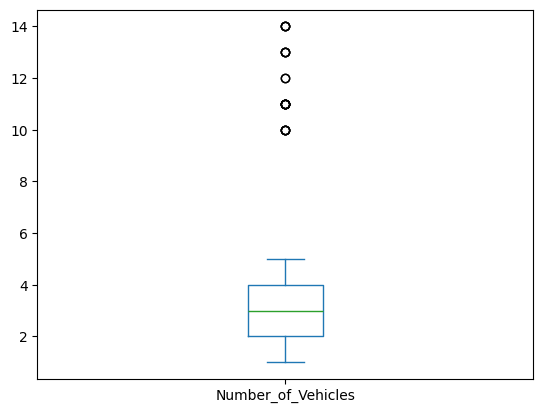

In [ ]:
df['Number_of_Vehicles'].plot(kind='box')


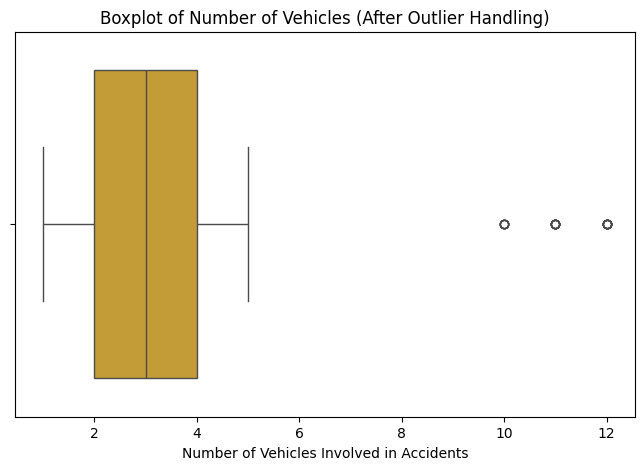

In [ ]:
# Handling outliers in Number_of_Vehicles by capping at the 99th percentile
num_vehicles_threshold = df["Number_of_Vehicles"].quantile(0.99)
df["Number_of_Vehicles"] = df["Number_of_Vehicles"].apply(lambda x: min(x, num_vehicles_threshold))

# Re-plotting the boxplot after outlier handling
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Number_of_Vehicles"], color="goldenrod")
plt.title("Boxplot of Number of Vehicles (After Outlier Handling)")
plt.xlabel("Number of Vehicles Involved in Accidents")
plt.show()


Number_of_Vehicles:
Before: Max was 14 vehicles (outlier).
After: Capped at 99th percentile value.
Reason: Large pileups are rare and could skew analysis.

<Axes: ylabel='Density'>

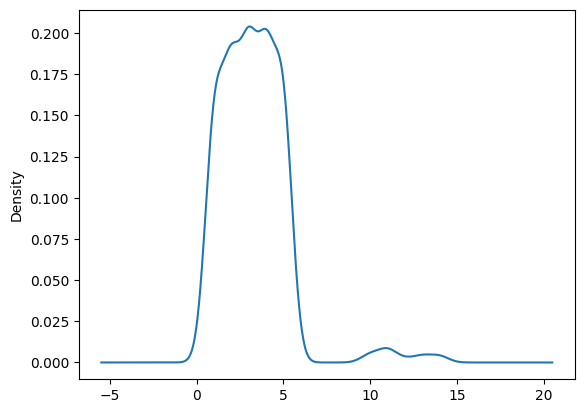

In [ ]:
df['Number_of_Vehicles'].plot(kind='kde')


In [ ]:
df.Number_of_Vehicles.skew()

2.1252870581487655

The age distribution is fairly spread out, ranging from young to older drivers.
The median (43) is close to the mean (43.47), suggesting a roughly normal distribution.
No extreme outliers (no very young or very old drivers).

In [ ]:
df.Driver_Age.skew()

0.062290656031554086

<Axes: ylabel='Frequency'>

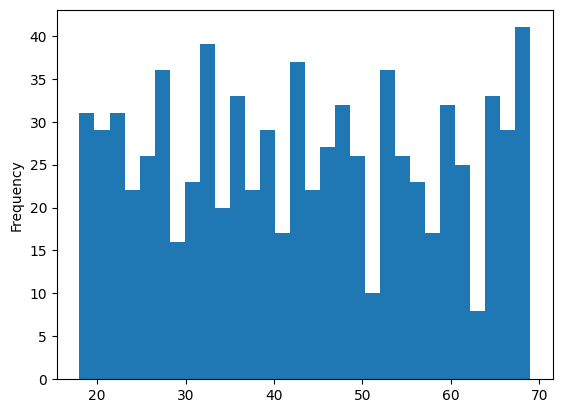

In [ ]:
df['Driver_Age'].plot(kind='hist', bins=30)

<Axes: >

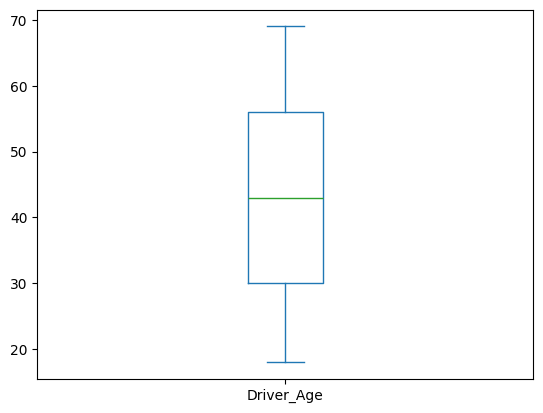

In [ ]:
df['Driver_Age'].plot(kind='box')


<Axes: ylabel='Density'>

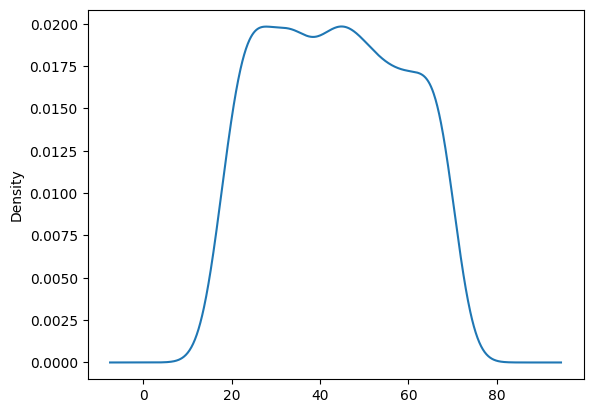

In [ ]:
df['Driver_Age'].plot(kind='kde')

Mean: 39.24 years of experience.
Minimum: 9 years (least experienced driver).
25th Percentile (Q1): 27 years (25% of drivers have less than this).
Median (Q2 / 50th Percentile): 39 years.
75th Percentile (Q3): 52 years (75% of drivers have less than this).
Maximum: 69 years of experience.
Distribution is fairly spread out with a max of 69 years, indicating a mix of young and highly experienced drivers.

In [ ]:
df.Driver_Experience.skew()

0.006513506827886151

<Axes: ylabel='Frequency'>

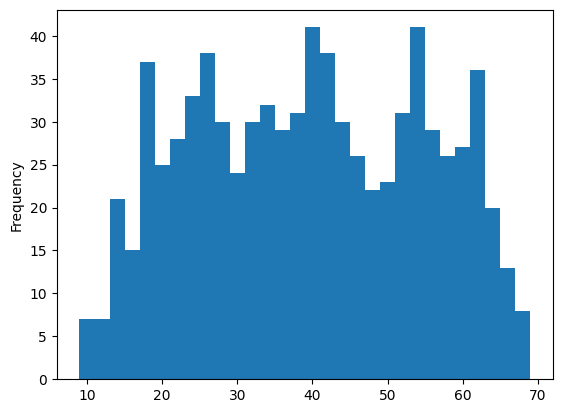

In [ ]:
df['Driver_Experience'].plot(kind='hist', bins=30)

<Axes: >

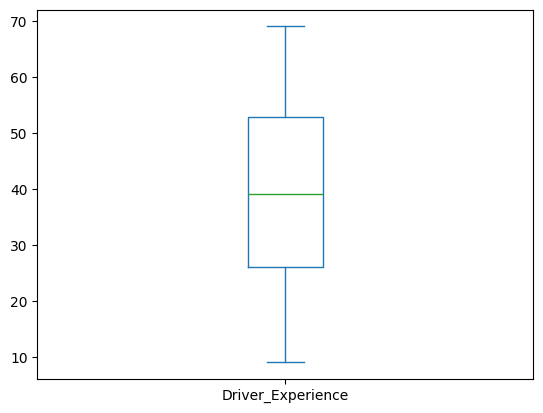

In [ ]:
df['Driver_Experience'].plot(kind='box')


<Axes: ylabel='Density'>

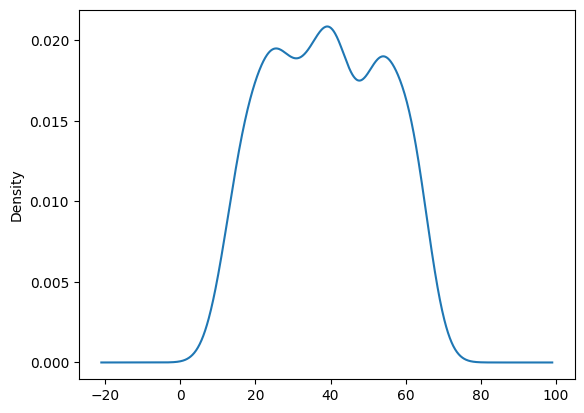

In [ ]:
df['Driver_Experience'].plot(kind='kde')

In [ ]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


Univariate analysis on categorical columns

1. Rain/Snow Impact: If bad weather conditions (rain, snow, fog) have fewer
   accidents, it may indicate that drivers are more cautious.
   Clear Weather Accidents: If clear weather has the highest count, it suggests that accidents happen more due to human errors than weather.
2. Most Accidents on a Specific Road Type: If highways or urban roads have the
   highest count, they are accident-prone areas.
   Low Accident Roads: Some road types have fewer accidents, possibly due to lower traffic or better safety measures.
   Urban vs. Rural Impact: Urban roads may have more accidents due to congestion, while highways may have severe accidents due to high speeds.
3. Peak Accident Hours: If morning or evening has the highest count, rush hours
   are the most accident-prone.
   Nighttime Accidents: If accidents at night are significant, poor visibility or fatigue might be factors.
   Midday Accidents: A high count in the afternoon may indicate increased traffic due to work and school schedules.
4. Most Common Severity: If minor accidents dominate, it suggests that most
   accidents are not life-threatening.
   Severe Accidents: If high-severity accidents have a significant count, the dataset may focus on dangerous road conditions or reckless driving.
   Balanced or Imbalanced Data: If one severity level is overwhelmingly high, it might impact model predictions, requiring resampling techniques.
5. Dry Roads: If most accidents occur on dry roads, driver behavior (speeding,
   distractions) is likely a major factor.
   Wet/Icy Roads: If wet or icy conditions have a high accident count, poor road grip and weather hazards play a key role.
   Unexpected Trends: If poor road conditions have fewer accidents, it might indicate that drivers are more cautious in such conditions.

<ipython-input-22-a87a07ca48ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', edgecolor='black')


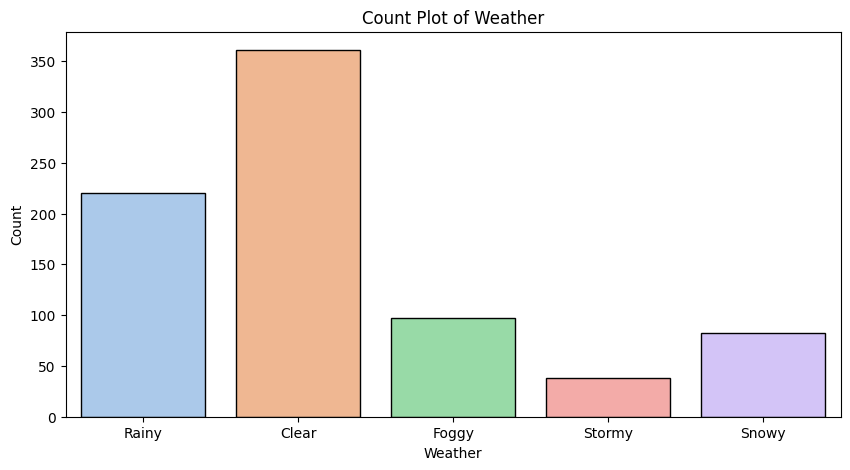

<ipython-input-22-a87a07ca48ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', edgecolor='black')


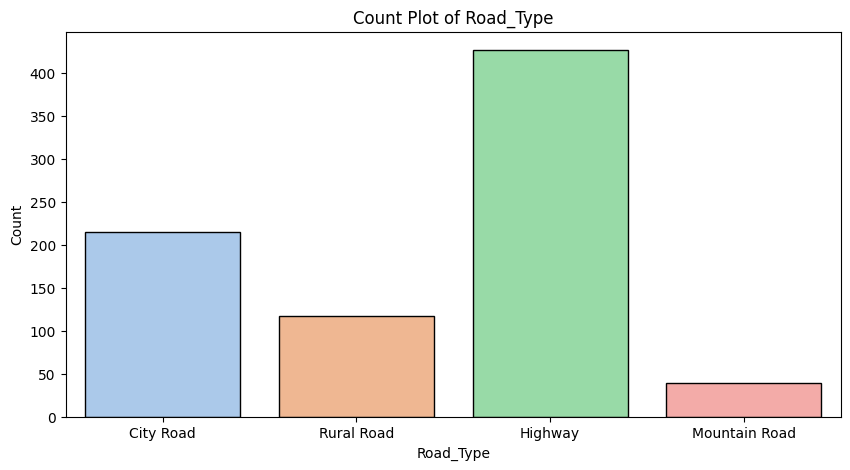

<ipython-input-22-a87a07ca48ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', edgecolor='black')


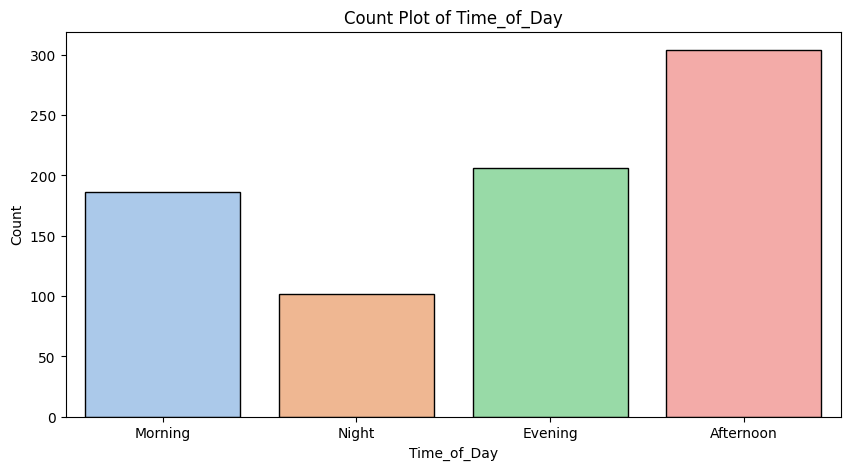

<ipython-input-22-a87a07ca48ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', edgecolor='black')


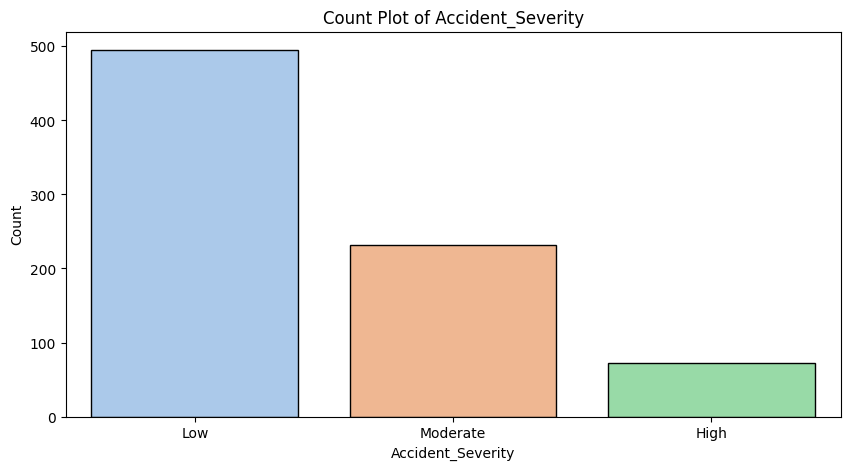

<ipython-input-22-a87a07ca48ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', edgecolor='black')


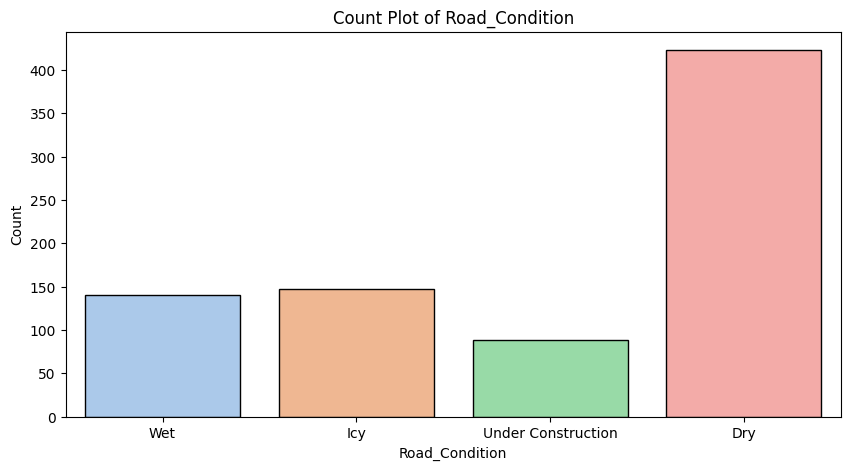

In [ ]:
categorical_cols = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
                    'Road_Condition']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, palette='pastel', edgecolor='black')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

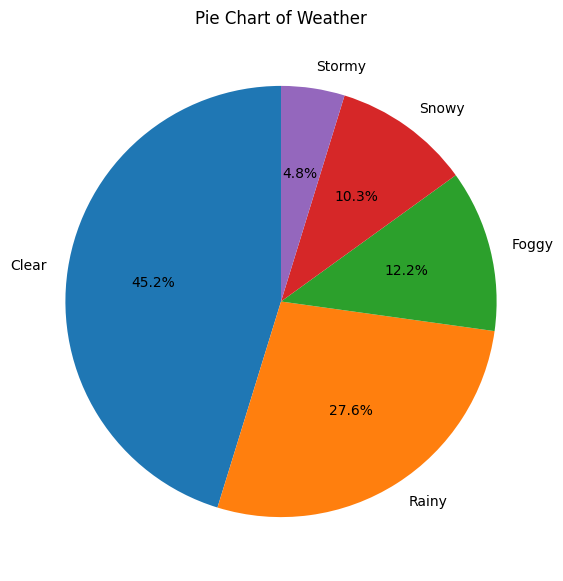

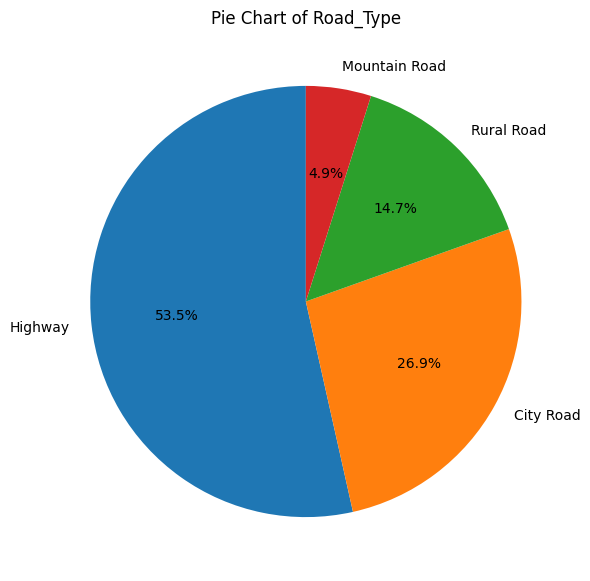

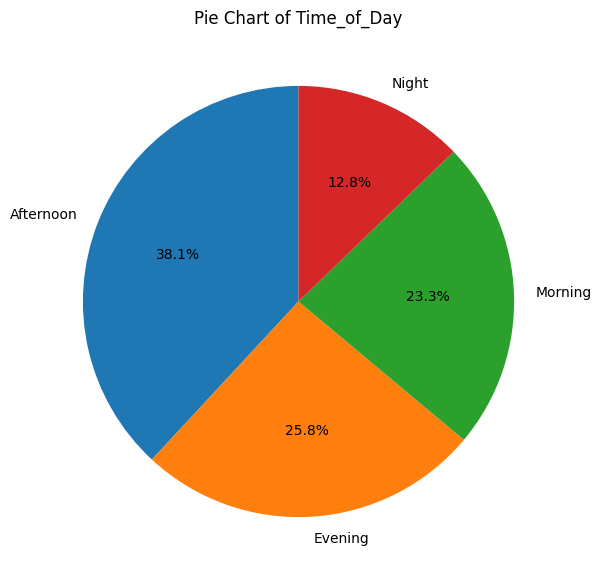

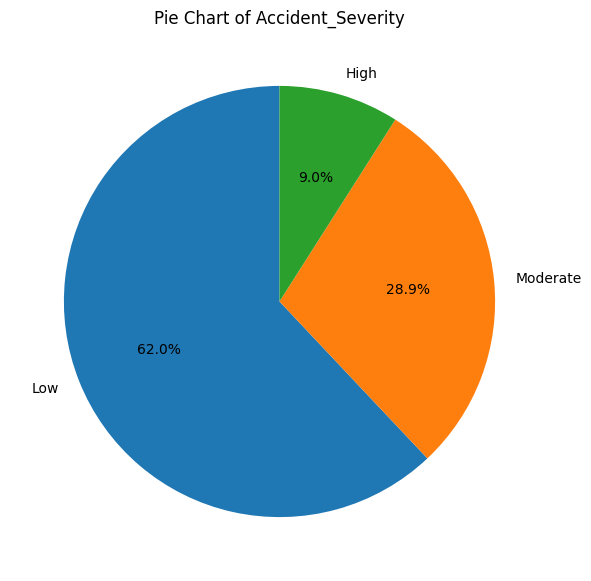

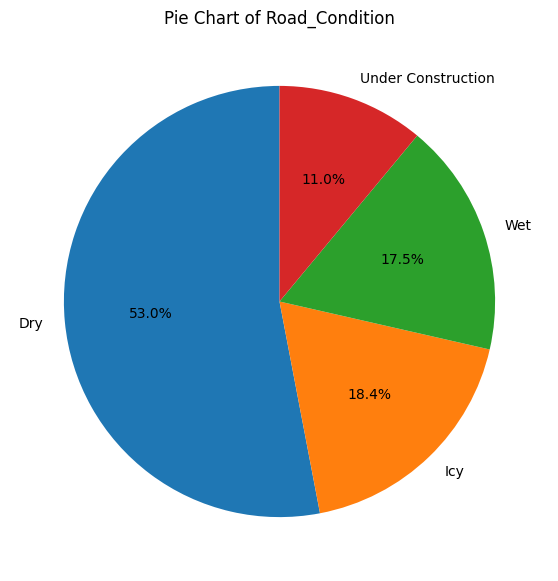

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(7, 7))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()


Bivariate analysis

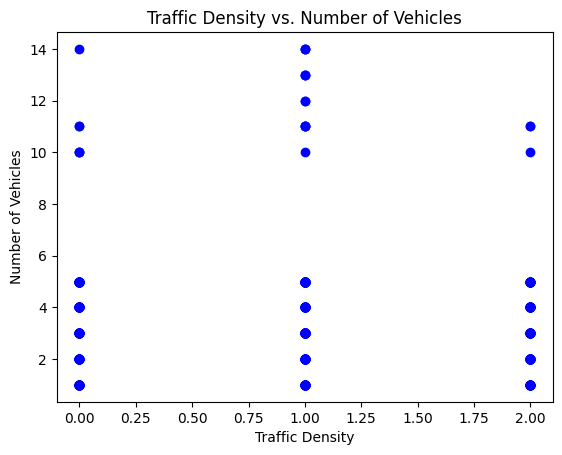

In [ ]:
plt.scatter(df['Traffic_Density'], df['Number_of_Vehicles'], color='blue')
plt.title('Traffic Density vs. Number of Vehicles')
plt.xlabel('Traffic Density')
plt.ylabel('Number of Vehicles')
plt.show()


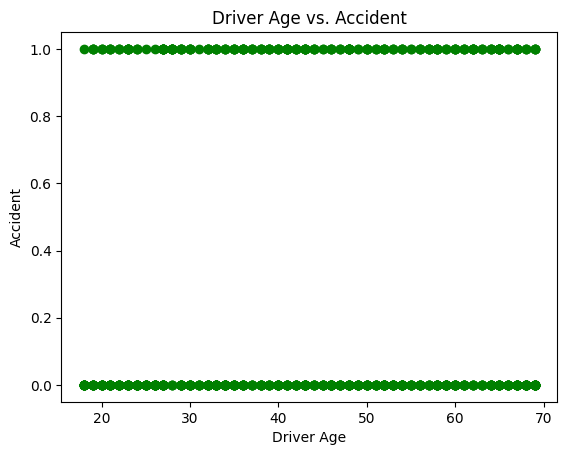

In [ ]:
plt.scatter(df['Driver_Age'], df['Accident'], color='green')
plt.title('Driver Age vs. Accident')
plt.xlabel('Driver Age')
plt.ylabel('Accident')
plt.show()


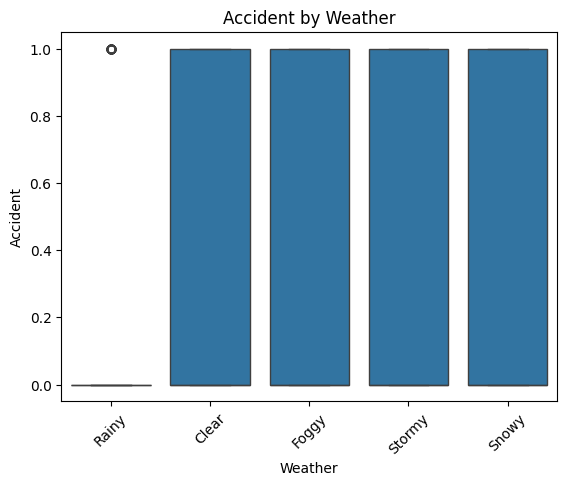

In [ ]:

sns.boxplot(x='Weather', y='Accident', data=df)
plt.title('Accident by Weather')
plt.xticks(rotation=45)
plt.show()


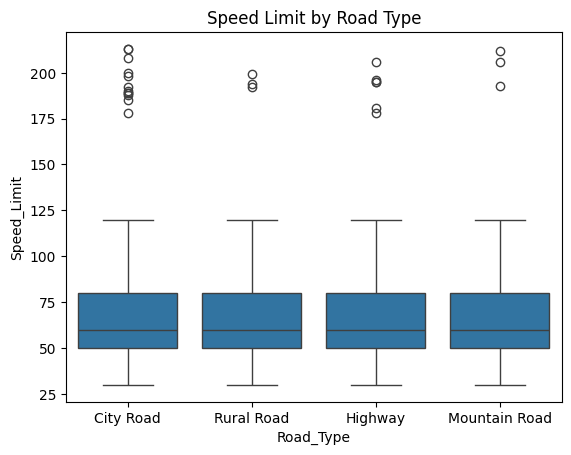

In [ ]:
sns.boxplot(x='Road_Type', y='Speed_Limit', data=df)
plt.title('Speed Limit by Road Type')
plt.show()


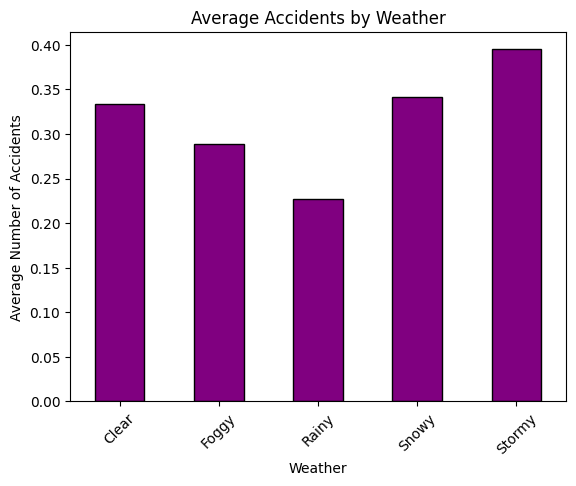

In [ ]:
df.groupby('Weather')['Accident'].mean().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Average Accidents by Weather')
plt.xlabel('Weather')
plt.ylabel('Average Number of Accidents')
plt.xticks(rotation=45)
plt.show()


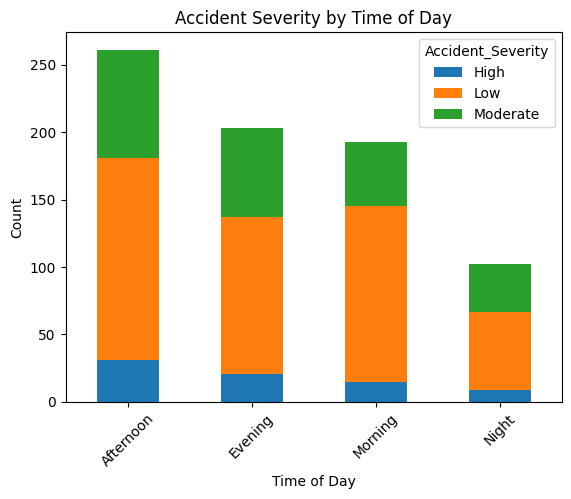

In [ ]:
pd.crosstab(df['Time_of_Day'], df['Accident_Severity']).plot(kind='bar', stacked=True)
plt.title('Accident Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


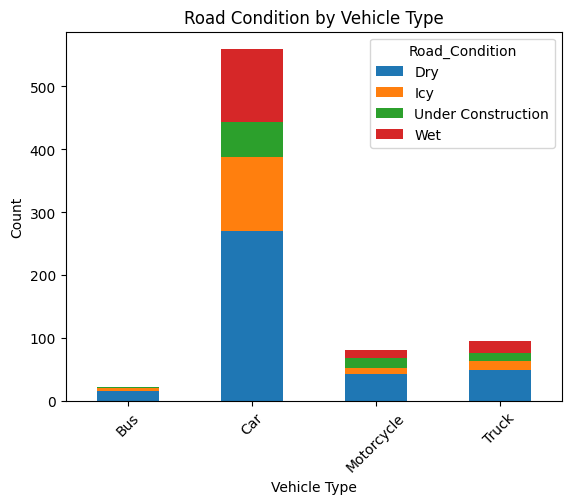

In [ ]:
pd.crosstab(df['Vehicle_Type'], df['Road_Condition']).plot(kind='bar', stacked=True)
plt.title('Road Condition by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


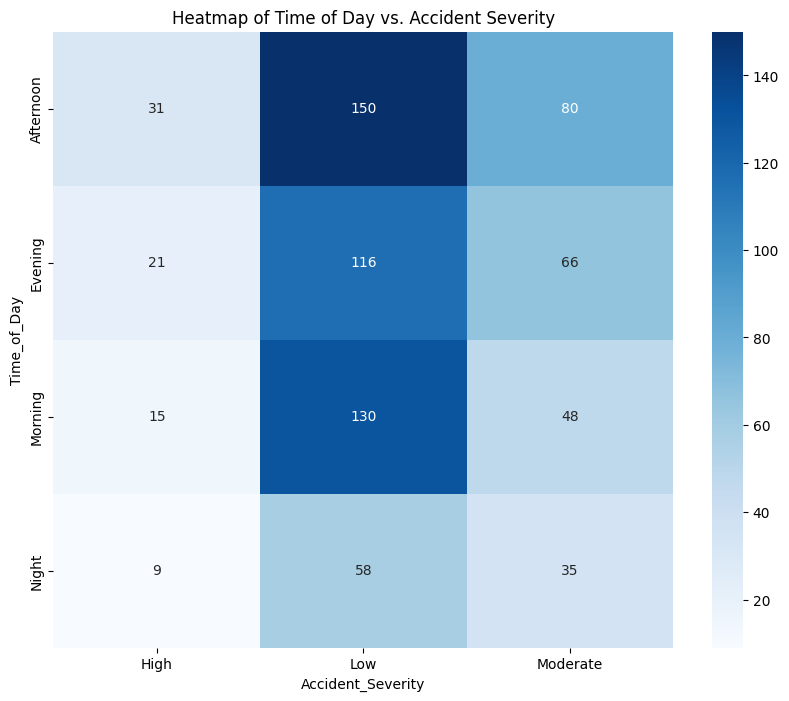

In [ ]:
heatmap_data = pd.crosstab(df['Time_of_Day'], df['Accident_Severity'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Time of Day vs. Accident Severity')
plt.show()


Multivariate analysis

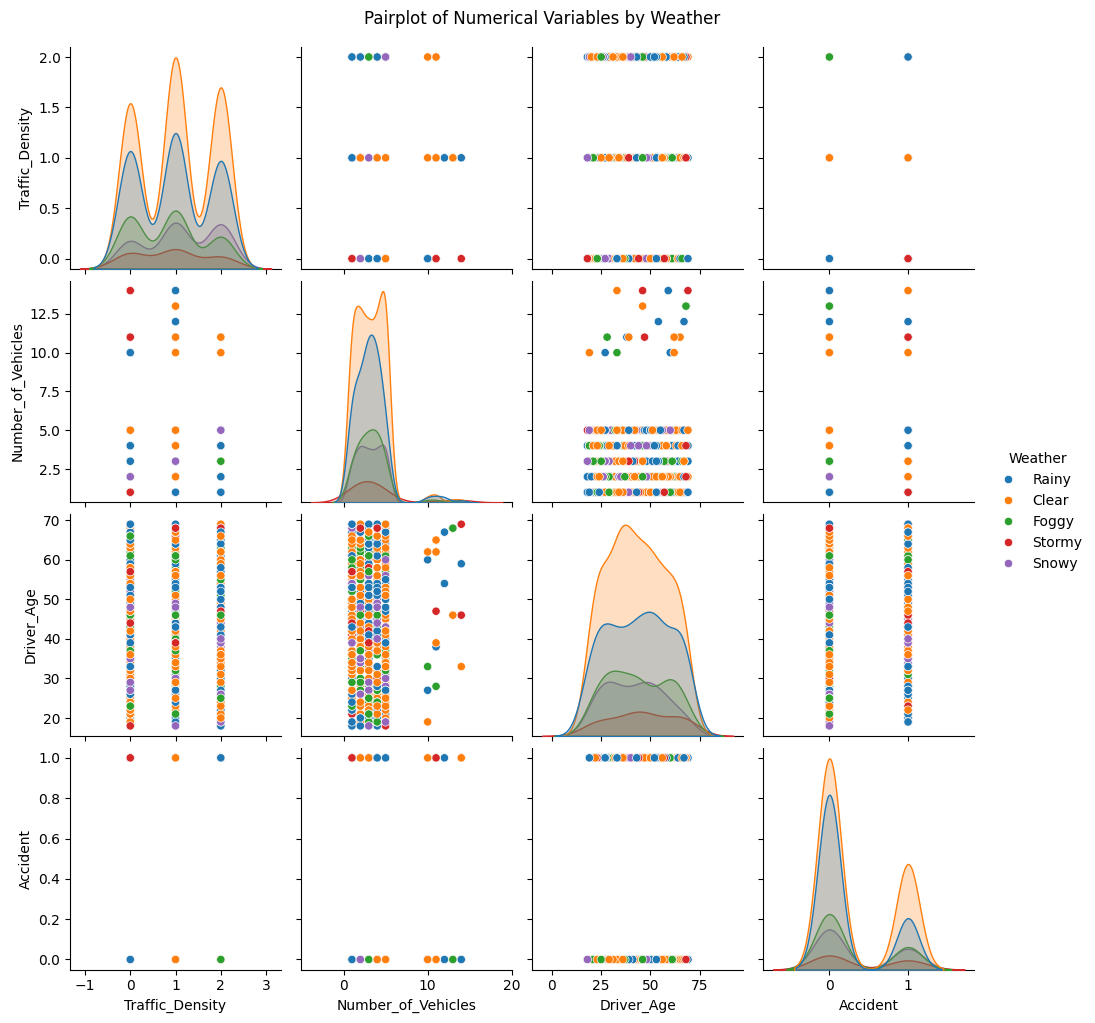

In [ ]:
sns.pairplot(df, vars=['Traffic_Density', 'Number_of_Vehicles', 'Driver_Age', 'Accident'], hue='Weather')
plt.suptitle('Pairplot of Numerical Variables by Weather', y=1.02)
plt.show()


In [ ]:
# Select features and target variable
X = df.drop(columns=['Accident'])
y = df['Accident']
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate models
print("Logistic Regression Performance:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_log):.4f}')


print("\nRandom Forest Classifier Performance:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')



Logistic Regression Performance:
Accuracy: 0.7000

Random Forest Classifier Performance:
Accuracy: 0.7438
